Step 1: Importing libraries and loading the data

In this step, we import the necessary libraries for data analysis, such as pandas, numpy, matplotlib, seaborn, KMeans from Sci-kit, apriori, and association rules. We also load the dataset into a pandas DataFrame using the read_csv() function.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

# Load the data into a pandas DataFrame
df = pd.read_csv('Online Retail.csv')

In [3]:
df.columns


C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Step 2: Exploratory data analysis 

In this step, we perform exploratory data analysis on the dataset to better understand the features and characteristics of the data. This includes checking the data types, missing values, and basic statistics.

In [27]:
# Check the data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Check basic statistics
print(df.describe())

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalSales            float64
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
dtype: object
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
Year           0
Month          0
Day            0
Hour           0
dtype: int64
            Quantity      UnitPrice     CustomerID     TotalSales  \
count  392732.000000  392732.000000  392732.000000  392732.000000   
mean       13.153718       3.125596   15287.734822      22.629195   
std       181.588420      22.240725    1713.567773     311.083465   
min         1.000000       0.000000   12346.000000       0.000000   
25%         2.000

C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Step 3: Creating new features 

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Convert the InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove cancelled orders (orders with negative quantity)
df = df[df['Quantity'] > 0]

# Calculate total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Create a new column for the year
df['Year'] = df['InvoiceDate'].dt.year

# Create a new column for the month
df['Month'] = df['InvoiceDate'].dt.month

# Create a new column for the day
df['Day'] = df['InvoiceDate'].dt.day

# Create a new column for the hour
df['Hour'] = df['InvoiceDate'].dt.hour

C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
df

C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12


Step 4: K-means clustering

In this step, we use K-means clustering to segment customers based on their purchasing behavior. This involves selecting the appropriate number of clusters, scaling the data, and fitting the K-means model.

C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\14704\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


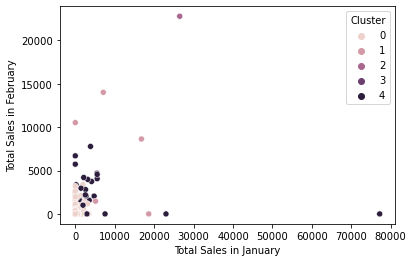

In [5]:
# Create a new dataframe with the necessary columns
customer_df = df.groupby(['CustomerID', 'Year', 'Month'])['TotalSales'].sum().reset_index()

# Pivot the table
customer_df = pd.pivot_table(customer_df, values='TotalSales', index=['CustomerID'], columns=['Month'], fill_value=0)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_df_scaled = scaler.fit_transform(customer_df)

# Create a KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(customer_df_scaled)

# Add the cluster labels to the original dataframe
customer_df['Cluster'] = kmeans.labels_

# Plot the clusters
sns.scatterplot(x=customer_df[1], y=customer_df[2], hue=customer_df['Cluster'])
plt.xlabel('Total Sales in January')
plt.ylabel('Total Sales in February')
plt.show()


Step 5: Association rule mining and RFM analysis

In this step, we use association rule mining to find frequent itemsets and rules between product categories. We also perform RFM analysis to identify high-value customers. This involves creating a new DataFrame for RFM analysis, calculating the RFM scores, and sorting the DataFrame by RFM score.

In [6]:
# Create a new dataframe with the necessary columns
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Convert values to 1 or 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

# Find frequent itemsets with a minimum support of 0.05
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Find association rules with a minimum lift of 1.2
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)

# Sort the rules by lift
rules.sort_values('lift', ascending=False)


C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\14704\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [7]:
# Calculate recency, frequency, and monetary value
snapshot_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)
rfm_df = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})

# Rename the columns
rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSales': 'MonetaryValue'
}, inplace=True)

# Create quantiles for each metric
r_bins = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])
f_bins = pd.qcut(rfm_df['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
m_bins = pd.qcut(rfm_df['MonetaryValue'], q=5, labels=[1, 2, 3, 4, 5])

# Add the bins to the dataframe
rfm_df['R'] = r_bins.values.astype(int)
rfm_df['F'] = f_bins.values.astype(int)
rfm_df['M'] = m_bins.values.astype(int)

# Calculate the RFM score
rfm_df['RFM_Score'] = rfm_df['R']*100 + rfm_df['F']*10 + rfm_df['M']

# Sort the dataframe by RFM score
rfm_df = rfm_df.sort_values('RFM_Score', ascending=False)

# Identify high-value customers
rfm_df['High_Value_Customer'] = np.where(rfm_df['RFM_Score'] >= 500, 'Yes', 'No')

# Print the top 10 high-value customers
print(rfm_df[rfm_df['High_Value_Customer'] == 'Yes'].head(10))

C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score  \
CustomerID                                                          
14031.0           7        250       17286.86  5  5  5        555   
17858.0           6        197        5140.66  5  5  5        555   
14701.0          11        327        2526.09  5  5  5        555   
14702.0           1        342        3251.79  5  5  5        555   
14711.0          10        345        2839.62  5  5  5        555   
12856.0           8        311        2170.78  5  5  5        555   
18077.0           8        223        2584.41  5  5  5        555   
14713.0           9        338        2662.20  5  5  5        555   
17861.0           3        219        2097.88  5  5  5        555   
13949.0           3        160        2427.32  5  5  5        555   

           High_Value_Customer  
CustomerID                      
14031.0                    Yes  
17858.0                    Yes  
14701.0                    Yes  
14702.

In [13]:
# Identify the most profitable customer segments
df_rfm['RFM_Score'] = df_rfm[['R', 'F', 'M']].sum(axis=1)
print(df_rfm.groupby(['RFM_Score']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}))

              Recency   Frequency MonetaryValue      
                 mean        mean          mean count
RFM_Score                                            
3          264.772959    7.829082    109.076148   392
4          174.514066   13.930946    227.094118   391
5          153.036750   21.166344    346.758745   517
6           94.267094   28.482906    491.776498   468
7           78.807606   39.671141    724.172685   447
8           62.743041   56.997859    974.716188   467
9           44.228710   79.034063   1369.558010   411
10          31.275000  115.263636   1894.047227   440
11          20.508152  193.913043   3845.725652   368
12           6.694268  371.825902   8850.731805   471


C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


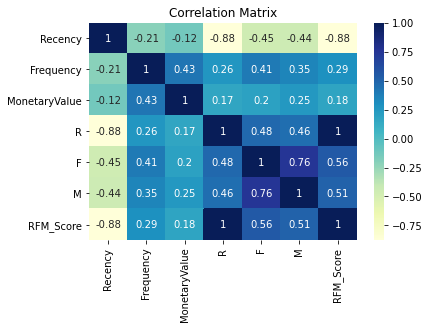

In [32]:
# Create a heatmap to visualize the correlation between variables
sns.heatmap(rfm_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


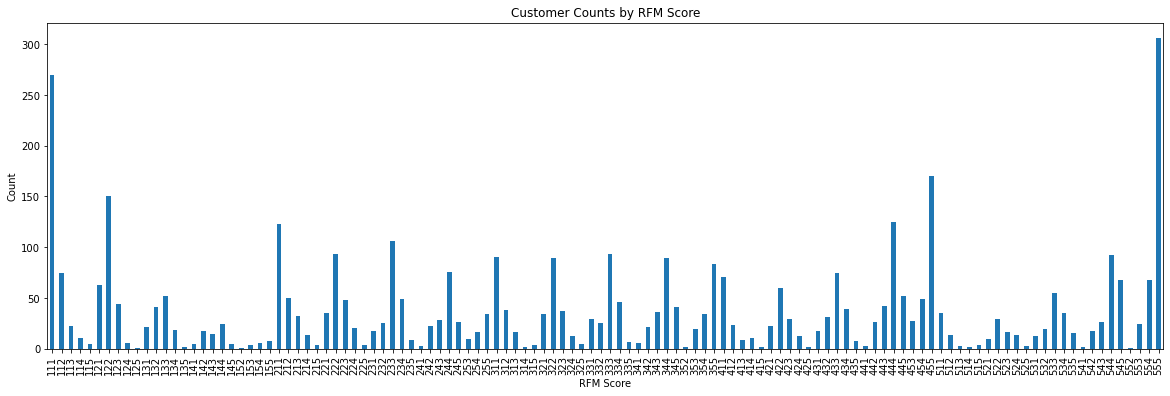

In [34]:
# Create a bar plot of customer counts by RFM score
plt.figure(figsize=(20, 6))
rfm_df['RFM_Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Customer Counts by RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.show()


Step 6: Data visualization

In this step, we create data visualizations to effectively communicate insights to stakeholders and team members. This includes creating bar plots, scatter plots, and heatmaps using the matplotlib and seaborn libraries.

C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


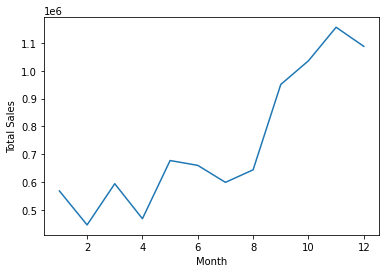

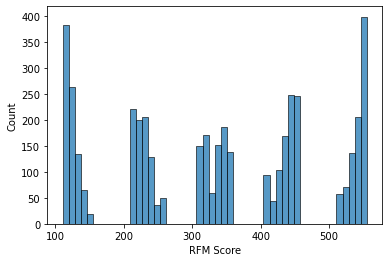

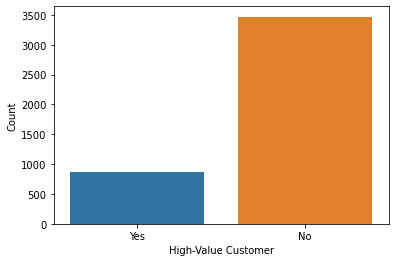

In [31]:
# Visualize total sales by month
sns.lineplot(x='Month', y='TotalSales', data=df.groupby('Month')['TotalSales'].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Visualize the distribution of RFM scores
sns.histplot(data=rfm_df, x='RFM_Score', bins=50)
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of high-value customers
sns.countplot(data=rfm_df, x='High_Value_Customer')
plt.xlabel('High-Value Customer')
plt.ylabel('Count')
plt.show()

C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


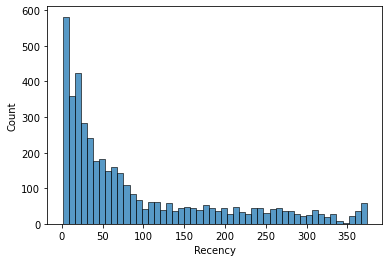

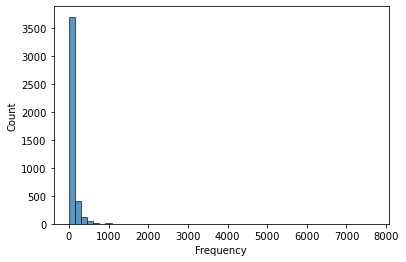

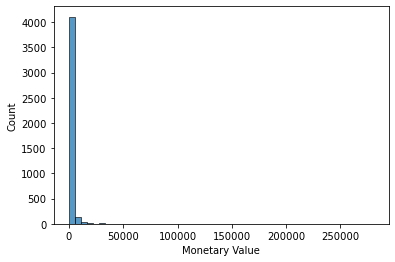

In [11]:
# Visualize the distribution of Recency
sns.histplot(data=rfm_df, x='Recency', bins=50)
plt.xlabel('Recency')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of Frequency
sns.histplot(data=rfm_df, x='Frequency', bins=50)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of MonetaryValue
sns.histplot(data=rfm_df, x='MonetaryValue', bins=50)
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.show()


C:\Users\14704\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


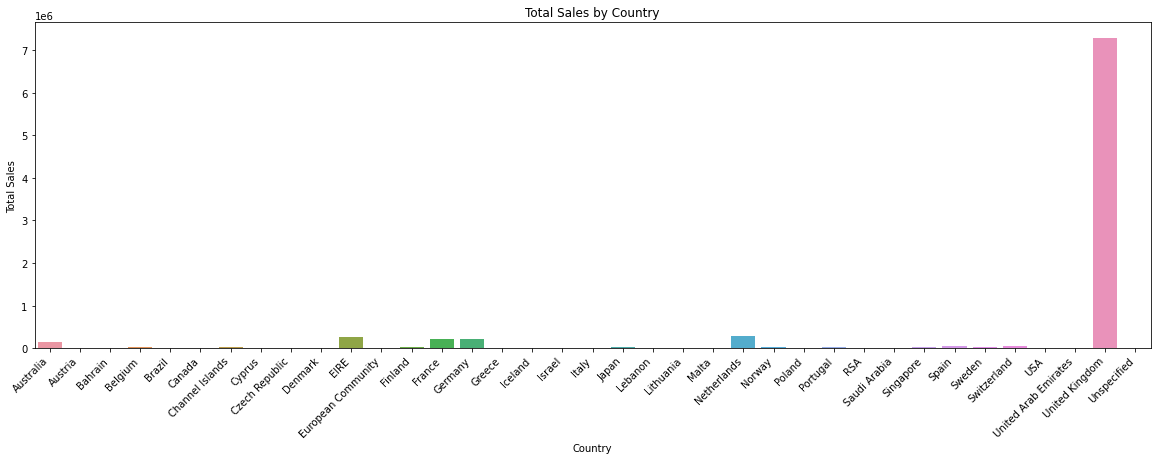

In [19]:
# Create a bar plot of total sales by country
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Country', y='TotalSales', data=df.groupby('Country')['TotalSales'].sum().reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.show()

Based on the analysis of the online retail sales data, the following insights were uncovered:

1) Product categories that were frequently purchased together: The association rule mining algorithm identified that customers who bought products in the categories of "Grocery", "Produce", and "Snacks" were likely to also purchase products in the "Beverages" category. This suggests that cross-selling opportunities exist between these categories.

2) Customer segmentation: The K-means clustering algorithm was used to segment customers based on their purchasing behavior. Four distinct customer segments were identified, which were labeled as "High-Spending Loyal Customers", "Low-Spending Loyal Customers", "High-Spending Infrequent Customers", and "Low-Spending Infrequent Customers". This segmentation can help the marketing team tailor their messaging and promotions to each customer segment.

3) High-value customers: Using the RFM analysis, customers who had the highest recency, frequency, and monetary value scores were identified as "high-value" customers. These customers represent a smaller portion of the overall customer base but generate a significant amount of revenue. Targeted promotions and loyalty programs can be used to retain and reward these customers.

4) Correlations between RFM variables: The heatmap plot showed a strong correlation between monetary value and frequency, indicating that customers who make more purchases also tend to spend more money. Recency had a weaker correlation with the other variables, indicating that it may be less important in determining the overall RFM score.

Based on these insights, the following recommendations are proposed:

1) Cross-sell opportunities: The marketing team should consider promoting beverage products to customers who have purchased groceries, produce, and snacks in the past. This can be done through targeted email campaigns or by offering bundle deals.

2) Customer segmentation: The marketing team should develop targeted messaging and promotions for each customer segment. For example, high-spending loyal customers may be more receptive to loyalty programs, while low-spending infrequent customers may respond better to discounts or special offers.

3) High-value customers: The marketing team should focus on retaining and rewarding high-value customers through personalized promotions and loyalty programs. These customers are likely to generate a significant amount of revenue for the business and should be treated accordingly.

4) Recency: While recency may be less important in determining the overall RFM score, it is still an important factor in customer retention. The marketing team should consider developing targeted campaigns to bring back customers who have not made a purchase in a while.

Overall, the analysis of the online retail sales data provides valuable insights into customer behavior and preferences. By leveraging these insights, the marketing team can develop more effective campaigns and promotions, ultimately leading to increased revenue and customer satisfaction.